<a href="https://colab.research.google.com/github/YorranPetrick/Analise_de_dados_Carros_Eletricos/blob/main/Carros_el%C3%A9tricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Projetos Analise de Dados/Kaggle/CSV/evdataset.csv")

In [ ]:
#Excluindo colunas desnecessárias para o projeto
df.drop(['link','Acceleration 0 - 100 km/h','Top Speed','Total Power','Charge Power',
         'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
         'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)',
         'Max. Payload', 'Seats', 'Electric Range',
        'Total Torque', 'Drive', 'id','Cargo Volume'], axis = 1,inplace = True, errors= 'ignore')


In [ ]:
df.columns

Index(['Make', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Battery Capacity'],
      dtype='object')

In [ ]:
#Renomeando colunas
df.rename(columns={'Make':'Marca',
                   'City - Cold Weather':'KM Cidade(-10 graus)',
                   'Highway - Cold Weather':'KM Rodovia (-10 graus)',
                   'Combined - Cold Weather':'KM Combinado (-10 graus)',
                   'City - Mild Weather':'KM Cidade (23 graus)',
                   'Highway - Mild Weather':'KM Rodovia( 23 graus)',
                   'Combined - Mild Weather':'Combinado (23 graus)',
                   'Battery Capacity':'Capacidade da bateria kw'},inplace=True)

df.head(10)

,Marca,KM Cidade(-10 graus),KM Rodovia (-10 graus),KM Combinado (-10 graus),KM Cidade (23 graus),KM Rodovia( 23 graus),Combinado (23 graus),Capacidade da bateria kw
0,Genesis,390,275,330,575,355,445,77.4
1,Mercedes,330,235,280,480,300,375,69.7
2,Porsche,400,305,350,580,385,470,93.4
3,BMW,445,340,390,670,440,540,83.9
4,Volkswagen,440,320,380,660,415,520,82.0
5,CUPRA,270,195,230,415,255,320,55.0
6,Skoda,320,235,275,480,300,375,62.0
7,Porsche,395,290,340,565,370,455,93.4
8,Skoda,395,290,340,580,370,460,82.0
9,Porsche,395,295,345,565,375,460,93.4


In [ ]:
#Criando colunas com dados sobre a eficiência dos automoveis, dividindo a kilometragem pela capacidade de bateria
df['Eficiencia KM/KW Cidade(-10 graus)'] = df['KM Cidade(-10 graus)']/df['Capacidade da bateria kw']
df['Eficiencia KM/KW Rodovia(-10 graus )'] = df['KM Rodovia (-10 graus)']/df['Capacidade da bateria kw']
df['Eficiencia KM/KW Combinado (-10 graus)'] = df['KM Combinado (-10 graus)']/df['Capacidade da bateria kw']
df['Eficiencia KM/KW Cidade (23 graus)'] = df['KM Cidade (23 graus)']/df['Capacidade da bateria kw']
df['Eficiencia KM/KW Rodovia (23 graus)'] = df['KM Rodovia( 23 graus)']/df['Capacidade da bateria kw']
df['Eficiencia KM/KW Combinado (23 graus)'] = df['Combinado (23 graus)']/df['Capacidade da bateria kw']

df.head()

,Marca,KM Cidade(-10 graus),KM Rodovia (-10 graus),KM Combinado (-10 graus),KM Cidade (23 graus),KM Rodovia( 23 graus),Combinado (23 graus),Capacidade da bateria kw,Eficiencia KM/KW Cidade(-10 graus),Eficiencia KM/KW Rodovia(-10 graus ),Eficiencia KM/KW Combinado (-10 graus),Eficiencia KM/KW Cidade (23 graus),Eficiencia KM/KW Rodovia (23 graus),Eficiencia KM/KW Combinado (23 graus)
0,Genesis,390,275,330,575,355,445,77.4,5.038760,3.552972,4.263566,7.428941,4.586563,5.749354
1,Mercedes,330,235,280,480,300,375,69.7,4.734577,3.371593,4.017217,6.886657,4.304161,5.380201
2,Porsche,400,305,350,580,385,470,93.4,4.282655,3.265525,3.747323,6.209850,4.122056,5.032120
3,BMW,445,340,390,670,440,540,83.9,5.303933,4.052443,4.648391,7.985697,5.244338,6.436234
4,Volkswagen,440,320,380,660,415,520,82.0,5.365854,3.902439,4.634146,8.048780,5.060976,6.341463


In [ ]:
df.describe

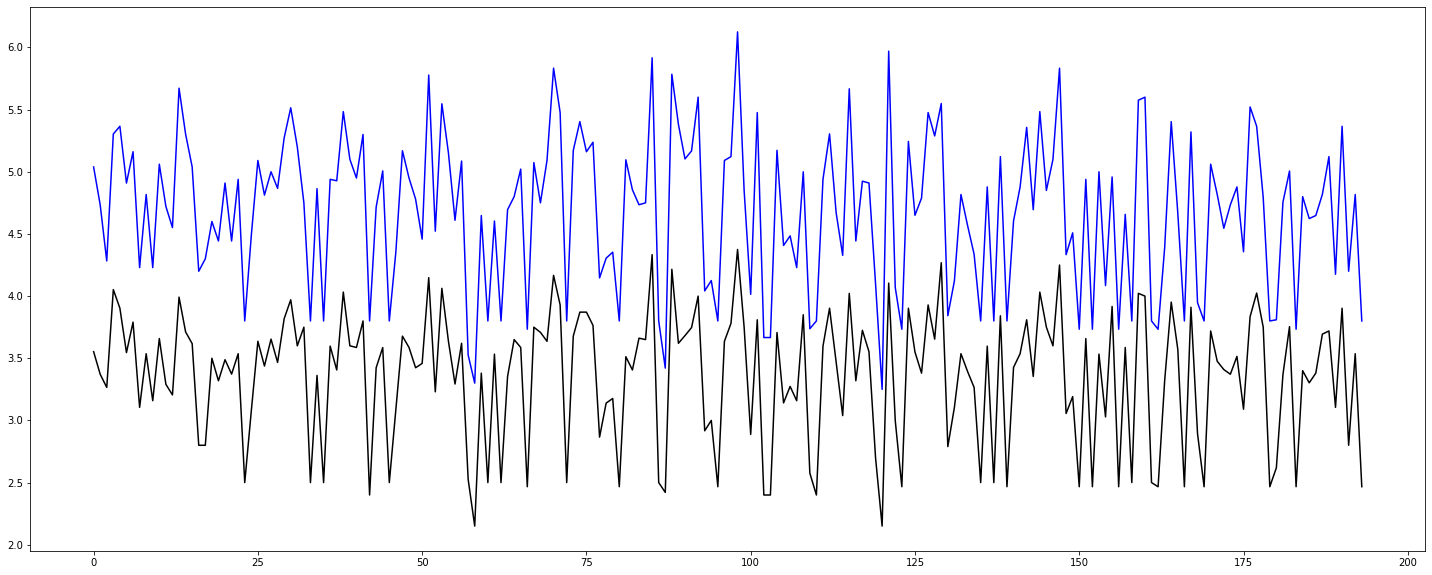

In [ ]:
#Demonstrando que os carros eletricos perdem eficiência nas Rodovias  a -10°
df['Eficiencia KM/KW Cidade(-10 graus)'].plot(kind='line',figsize=(25,10),color ='blue');
df['Eficiencia KM/KW Rodovia(-10 graus )'].plot(kind='line',figsize=(25,10),color='black');

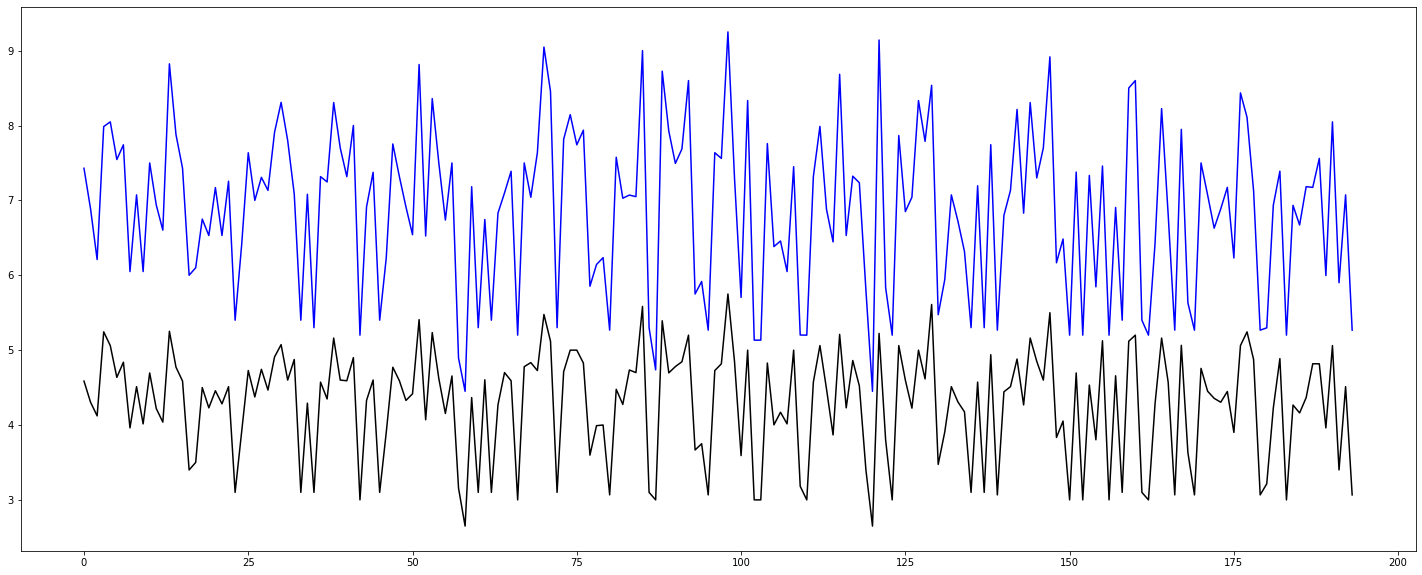

In [ ]:
#Demonstrando que os carros eletricos perdem eficiência nas Rodovias  a 23°
df['Eficiencia KM/KW Cidade (23 graus)'].plot(kind='line',figsize=(25,10),color ='blue');
df['Eficiencia KM/KW Rodovia (23 graus)'].plot(kind='line',figsize=(25,10),color='black');

In [ ]:
#Criando tabelas temporarias, sem alterar o dataframe
df['Perda de eficiencia (23 graus)'] = df['Eficiencia KM/KW Rodovia (23 graus)'] - df['Eficiencia KM/KW Cidade (23 graus)'] 
df['Perda de eficiencia (-10 graus)'] = df['Eficiencia KM/KW Rodovia(-10 graus )'] - df['Eficiencia KM/KW Cidade(-10 graus)'];

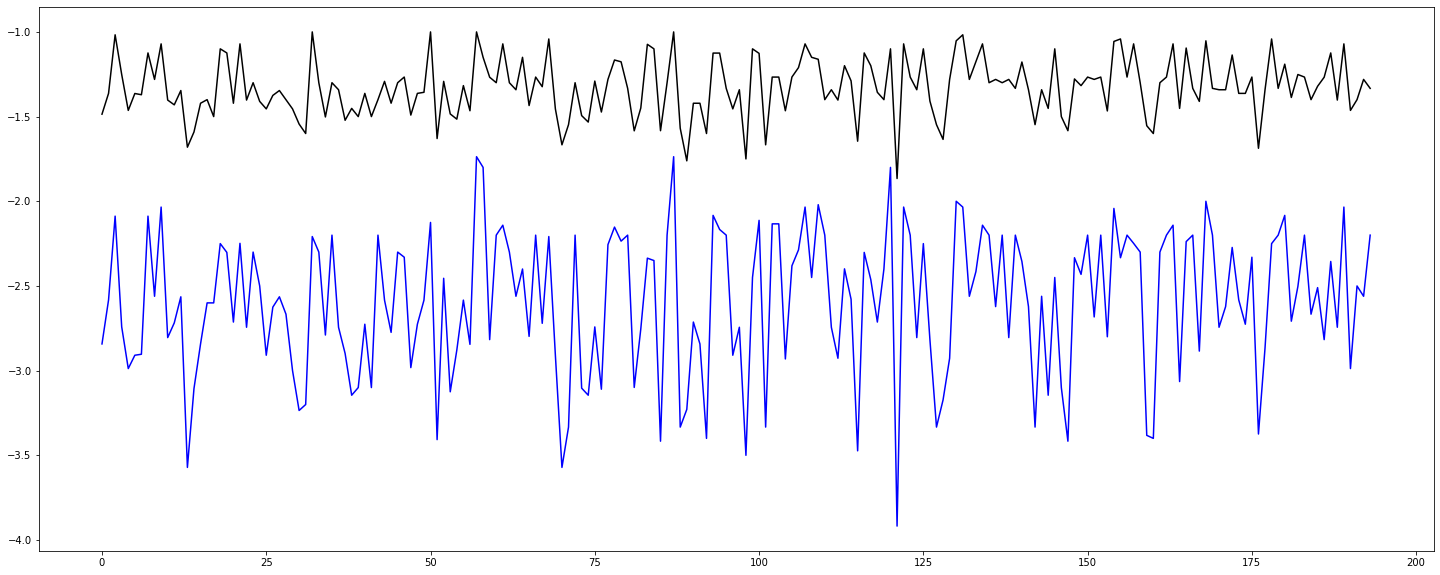

In [ ]:
# Demonstrando que há uma maior variação de perda de eficiência em locais com 23 graus em comparação a -10 graus
df['Perda de eficiencia (-10 graus)'].plot(color = 'black',figsize=(25,10))
df['Perda de eficiencia (23 graus)'].plot(color ='blue',figsize=(25,10));